In [157]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.cluster import KMeans

In [158]:
mat_file = sio.loadmat('matlab.mat')

In [159]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MODE', 'showImg', 'PHOW_Sizes', 'PHOW_Step', 'imgSel', 'folderName', 'classList', 'cnt', 'c', 'subFolderName', 'imgList', 'imgIdx', 'imgIdx_tr', 'imgIdx_te', 'i', 'I', 'desc_tr', 'desc_sel', 'numBins', 'desc_te'])

In [160]:
mat_file['desc_tr'][0][0].shape

(128, 3363)

In [457]:
classList = mat_file['classList']

classList

array([[array(['tick'], dtype='<U4'), array(['trilobite'], dtype='<U9'),
        array(['umbrella'], dtype='<U8'), array(['watch'], dtype='<U5'),
        array(['water_lilly'], dtype='<U11'),
        array(['wheelchair'], dtype='<U10'),
        array(['wild_cat'], dtype='<U8'),
        array(['windsor_chair'], dtype='<U13'),
        array(['wrench'], dtype='<U6'), array(['yin_yang'], dtype='<U8')]],
      dtype=object)

In [288]:
desc_count = 0

for i in range( 10 ):
    
    for j in range( 15 ):

        desc_count += desc_tr[ i ][ j ].shape[ 1 ]
        
desc_count

421183

## K-Means Codebook

In [161]:
desc_sel = mat_file[ 'desc_sel' ]
desc_sel = desc_sel.T

desc_sel.shape

(100000, 128)

In [162]:
no_clusters = 256

codebook = KMeans( n_clusters = no_clusters, random_state = 0 ).fit( desc_sel )

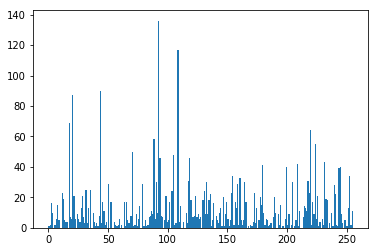

In [171]:
test = desc_tr[0][4]

result = codebook.predict( test.T )

plt.hist( result, bins = range( 0, 256 ) )
plt.show()

In [240]:
test

(3363, 128)

In [172]:
hist = np.histogram( result, bins = range( 0, 256 ) )

hist[ 0 ].shape

(255,)

In [173]:
class_0 = desc_tr[ 3 ]

avg_hist = []

for image in class_0:
    
    result = codebook.predict( image.T )
    avg_hist.append( np.histogram( result, bins = 256 )[ 0 ] )
    
avg_hist = np.asarray( avg_hist )
avg_hist = avg_hist.mean(axis = 0)

<BarContainer object of 256 artists>

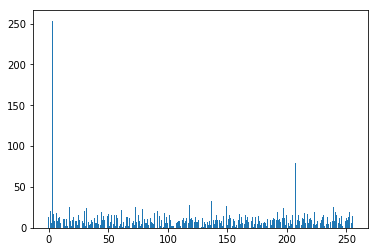

In [174]:
plt.bar( range( 0, 256 ), avg_hist )

# Utility Functions

In [337]:
def vq_data( data, codebook, vocab_size ):
    
    train_vq = []
    
    for image in data:
        image = image.T

        image_vq = codebook.predict( image )
        image_vq = np.histogram( image_vq, bins = vocab_size )[ 0 ]

        train_vq.append( image_vq )

    train_vq = np.asarray( train_vq )
    
    return train_vq

___
# Question 1

## Train Images

In [415]:
desc_tr = mat_file[ 'desc_tr' ]

print( desc_tr.shape )

label_tr = np.asarray( [i for i in range(1,11) for x in range(15)] )

label_tr.shape

(10, 15)


(150,)

In [416]:
train = desc_tr.reshape( 150 )

train[ 0 ].T.shape

(3363, 128)

## Test Images

In [417]:
desc_te = mat_file[ 'desc_te' ]

print( desc_tr.shape )

label_te = np.asarray( [i for i in range(1,11) for x in range(15)] )

(10, 15)


## Vary Vocabulary Size

In [418]:
random_state = 0
img_index    = 60

### Size 2

In [445]:
%%time
vocab_size = 2
codebook_2 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 16 s, sys: 606 ms, total: 16.6 s
Wall time: 13.9 s


In [441]:
train_vq_2 = vq_data( train, codebook_2, 2 )
print( train_vq_2.shape )

(150, 2)
CPU times: user 932 ms, sys: 19 ms, total: 951 ms
Wall time: 486 ms


### Size 16

In [446]:
%%time
vocab_size  = 16
codebook_16 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 1min 26s, sys: 3 s, total: 1min 29s
Wall time: 45 s


In [443]:
%%time
train_vq_16 = vq_data( train, codebook_16, 16 )
print( train_vq_16.shape )

(150, 16)
CPU times: user 1.06 s, sys: 37.4 ms, total: 1.09 s
Wall time: 557 ms


### Size 64

In [447]:
%%time
vocab_size  = 64
codebook_64 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 4min 11s, sys: 10.2 s, total: 4min 21s
Wall time: 2min 15s


In [444]:
train_vq_64 = vq_data( train, codebook_64, 64 )
print( train_vq_64.shape )

(150, 64)
CPU times: user 1.86 s, sys: 32.2 ms, total: 1.89 s
Wall time: 953 ms


### Size 128

In [448]:
%%time
vocab_size   = 128
codebook_128 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 7min 44s, sys: 1min 11s, total: 8min 56s
Wall time: 4min 41s


In [426]:
train_vq_128 = vq_data( train, codebook_128, 128 )
print( train_vq_128.shape )

(150, 128)


## Size 256

In [516]:
%%time
vocab_size   = 256
codebook_256 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 11min 54s, sys: 1min 50s, total: 13min 45s
Wall time: 8min 1s


In [517]:
%%time
train_vq_256 = vq_data( train, codebook_256, 256 )
print( train_vq_256.shape )

(150, 256)
CPU times: user 5.43 s, sys: 122 ms, total: 5.55 s
Wall time: 2.81 s


## Size 512

In [518]:
%%time
vocab_size   = 512
codebook_512 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

CPU times: user 15min 21s, sys: 2min 27s, total: 17min 49s
Wall time: 12min 28s


In [519]:
%%time
train_vq_512 = vq_data( train, codebook_512, 512 )
print( train_vq_512.shape )

(150, 512)
CPU times: user 9.2 s, sys: 219 ms, total: 9.42 s
Wall time: 4.73 s


## Computation Time of K-Means

Text(0.5,1,'Vocabulary Size vs Computation Time')

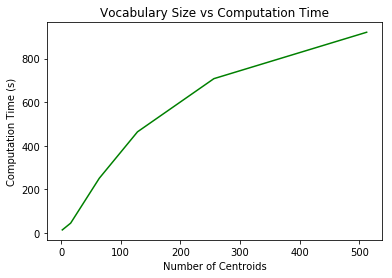

In [520]:
x = [ 2, 16, 64, 128, 256, 512 ]
y = [ 13.9, 45, 251, 464 , 708, 921 ]

fig = plt.figure()
plt.plot( x, y, 'g' )
plt.xlabel( 'Number of Centroids' )
plt.ylabel( 'Computation Time (s)' )
plt.title( 'Vocabulary Size vs Computation Time' )


## Histograms

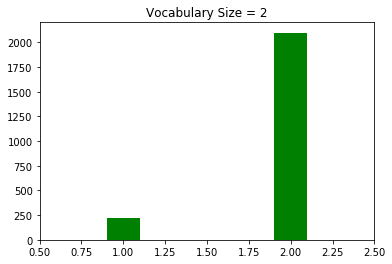

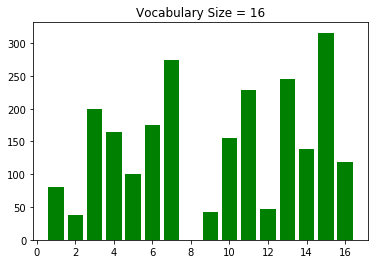

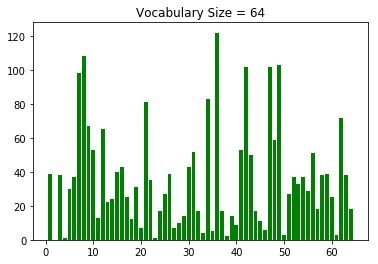

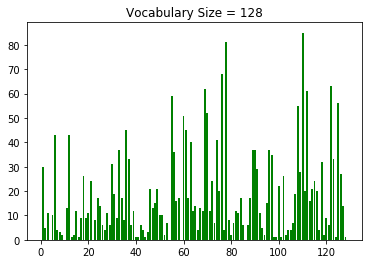

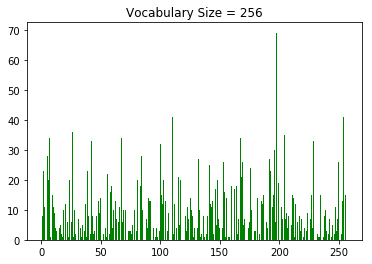

In [452]:
col = 'green'

fig1 = plt.figure()
plt.xlim( 0.5, 2.5 )
plt.bar( [1, 2], train_vq_2[ img_index ], color = col, width = 0.2 )
plt.title( 'Vocabulary Size = 2')

fig2 = plt.figure()
plt.bar( range( 1, 17 ), train_vq_16[ img_index ], color = col )
plt.title( 'Vocabulary Size = 16')


fig3 = plt.figure()
plt.bar( range( 1, 65 ), train_vq_64[ img_index ], color = col )
plt.title( 'Vocabulary Size = 64')


fig4 = plt.figure()
plt.bar( range( 1, 129 ), train_vq_128[ img_index ], color = col )
plt.title( 'Vocabulary Size = 128')


fig5 = plt.figure()
plt.bar( range( 1, 257 ), train_vq_256[ img_index ], color = col )
plt.title( 'Vocabulary Size = 256')


plt.show()

___

# Question 2

[ sklearn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [430]:
from sklearn.ensemble import RandomForestClassifier

In [431]:
p_n_estimators = 900
p_criterion    = 'entropy'
p_max_depth    = 8

In [432]:
train_vq_256.shape
label_tr.shape

clf = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion )

clf.fit( train_vq_256, label_tr )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [433]:
test = desc_te.reshape( 150 )

test_vq_256 = vq_data( test, codebook_256, 256 )

In [434]:
predict = clf.predict( test_vq_256 )

In [435]:
Accuracy = ( np.sum( predict == label_te ) / label_te.shape[ 0 ] * 100 )

print( 'Accuracy: {} %'.format( Accuracy ) )

Accuracy: 72.66666666666667 %


## Varying Vocabular Size

In [521]:
# Vector Quantize the test data
test = desc_te.reshape( 150 )

test_vq_2   = vq_data( test, codebook_2, 2 )
test_vq_16  = vq_data( test, codebook_16, 16 )
test_vq_64  = vq_data( test, codebook_64, 64 )
test_vq_128 = vq_data( test, codebook_128, 128 )
test_vq_256 = vq_data( test, codebook_256, 256 )
test_vq_512 = vq_data( test, codebook_512, 512 )

test_vq = [ test_vq_2, test_vq_16, test_vq_64, test_vq_128, test_vq_256, test_vq_512 ]

In [555]:
%%time
# Parameters
p_n_estimators = 300
p_criterion    = 'entropy'
p_max_depth    = 4
p_max_features = 'auto'


clf_2   = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_16  = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_64  = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_128 = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_256 = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_512 = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_2.fit( train_vq_2, label_tr )
clf_16.fit( train_vq_16, label_tr )
clf_64.fit( train_vq_64, label_tr )
clf_128.fit( train_vq_128, label_tr )
clf_256.fit( train_vq_256, label_tr )
clf_512.fit( train_vq_512, label_tr )

CPU times: user 4.16 s, sys: 214 µs, total: 4.16 s
Wall time: 4.17 s


In [551]:
rf_clf = [ clf_2, clf_16, clf_64, clf_128, clf_256, clf_512 ]

accuracies = []

for i in range( len( rf_clf ) ):
    
    pred     = rf_clf[ i ].predict( test_vq[ i ] )
    accuracy = ( np.sum( pred == label_te ) / label_te.shape[ 0 ] * 100 )
    
    accuracies.append( accuracy )


[20.666666666666668,
 59.333333333333336,
 67.33333333333333,
 70.66666666666667,
 70.66666666666667,
 72.66666666666667]

## Varying Max Depth

In [577]:
md_accuracy = []
md_time = []

In [588]:
%%time

p_max_depth    = 32

p_n_estimators = 900
p_criterion    = 'entropy'
p_max_features = 'auto'

clf_256_max_depth = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_256_max_depth.fit( train_vq_256, label_tr )

pred = clf_256_max_depth.predict( test_vq_256 )
accuracy = ( np.sum( pred == label_te ) / label_te.shape[ 0 ] * 100 )

md_accuracy.append( accuracy )


CPU times: user 2.87 s, sys: 0 ns, total: 2.87 s
Wall time: 2.87 s


In [590]:
md_time = [ 1.46, 1.87, 2.56, 2.85, 2.87, 2.87 ]

print( md_accuracy )

md_depths = [ 1, 2, 4, 8, 12, 32 ]


[61.33333333333333, 63.33333333333333, 69.33333333333334, 71.33333333333334, 74.0, 72.66666666666667]


Text(0,0.5,'Accuracy(%)')

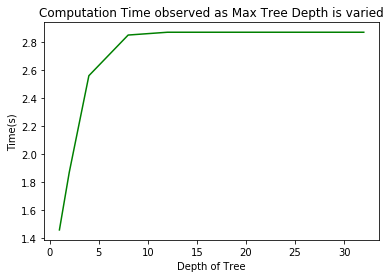

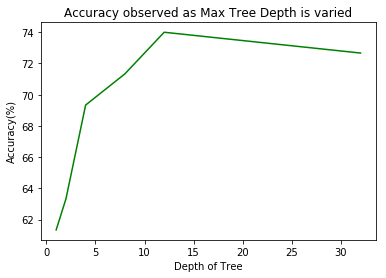

In [597]:
fig = plt.figure()
plt.plot( md_depths, md_time, 'g' )
plt.title( 'Computation Time observed as Max Tree Depth is varied' )
plt.xlabel( 'Depth of Tree' )
plt.ylabel( 'Time(s)' )

fig2 = plt.figure()
plt.plot( md_depths, md_accuracy, 'g' )
plt.title( 'Accuracy observed as Max Tree Depth is varied' )
plt.xlabel( 'Depth of Tree' )
plt.ylabel( 'Accuracy(%)' )

## Varying Number of Trees in Forest

In [622]:
nt_accuracy = []
nt_time = []

In [623]:
nt_trees = [ 50, 100, 200, 500, 900, 1500, 3000 ]

In [635]:
%%time

p_n_estimators = nt_trees[ 6 ]

p_max_depth    = 8
p_criterion    = 'entropy'
p_max_features = 'auto'

clf_256_max_depth = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_256_max_depth.fit( train_vq_256, label_tr )

pred = clf_256_max_depth.predict( test_vq_256 )
accuracy = ( np.sum( pred == label_te ) / label_te.shape[ 0 ] * 100 )

nt_accuracy.append( accuracy )

CPU times: user 9.35 s, sys: 0 ns, total: 9.35 s
Wall time: 9.35 s


In [636]:
nt_time = [ 0.181, 0.325, 0.652, 1.62, 3.04, 4.76, 9.38 ]

print( nt_accuracy )

[66.0, 72.0, 71.33333333333334, 72.0, 72.66666666666667, 72.0, 72.0]


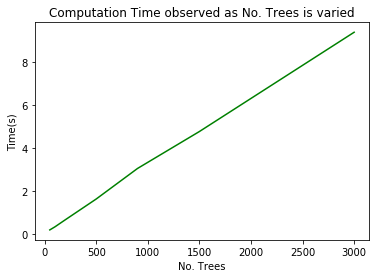

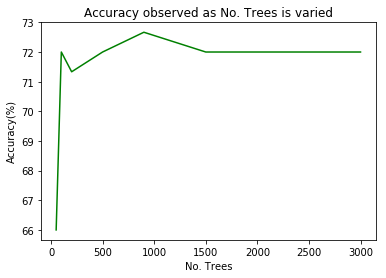

In [639]:
fig = plt.figure()
plt.plot( nt_trees, nt_time, 'g' )
plt.title( 'Computation Time observed as No. Trees is varied' )
plt.xlabel( 'No. Trees' )
plt.ylabel( 'Time(s)' )

fig2 = plt.figure()
plt.plot( nt_trees, nt_accuracy, 'g' )
plt.title( 'Accuracy observed as No. Trees is varied' )
plt.xlabel( 'No. Trees' )
plt.ylabel( 'Accuracy(%)' )

plt.show()

## Varying Randomness Parameter

In [640]:
rp_accuracy = []
rp_time = []

In [657]:
rp_p = [ 1, 2, 4, 8, 12, 20, 50, None ]

In [658]:
%%time

p_max_features = rp_p[ 6 ]

p_n_estimators = 900
p_max_depth    = 8
p_criterion    = 'entropy'


clf_256_max_depth = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )

clf_256_max_depth.fit( train_vq_256, label_tr )

pred = clf_256_max_depth.predict( test_vq_256 )
accuracy = ( np.sum( pred == label_te ) / label_te.shape[ 0 ] * 100 )

rp_accuracy.append( accuracy )

CPU times: user 5.93 s, sys: 6.91 ms, total: 5.94 s
Wall time: 5.94 s


In [659]:
rp_time = [ 1.71, 1.45, 1.71, 2.08, 2.49, 3.22, 5.85, 5.93 ]

print( rp_accuracy )

[66.66666666666666, 68.0, 69.33333333333334, 72.66666666666667, 73.33333333333333, 72.66666666666667, 72.0, 72.66666666666667]


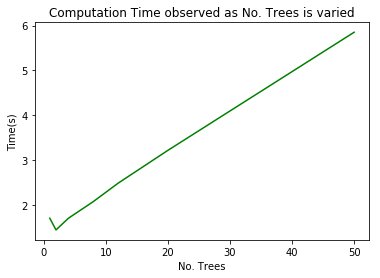

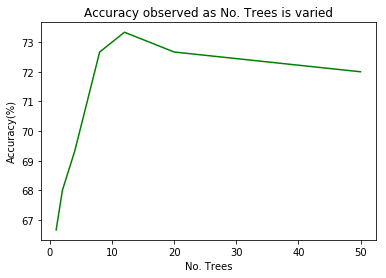

In [661]:
fig = plt.figure()
plt.plot( rp_p, rp_time, 'g' )
plt.title( 'Computation Time observed as No. Trees is varied' )
plt.xlabel( 'No. Trees' )
plt.ylabel( 'Time(s)' )

fig2 = plt.figure()
plt.plot( rp_p, rp_accuracy, 'g' )
plt.title( 'Accuracy observed as No. Trees is varied' )
plt.xlabel( 'No. Trees' )
plt.ylabel( 'Accuracy(%)' )

plt.show()

## Testing Histograms

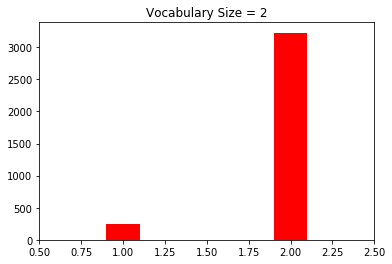

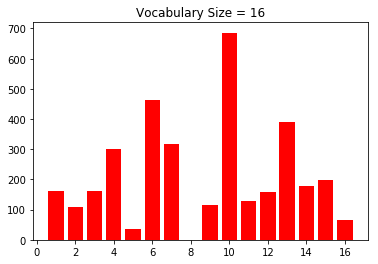

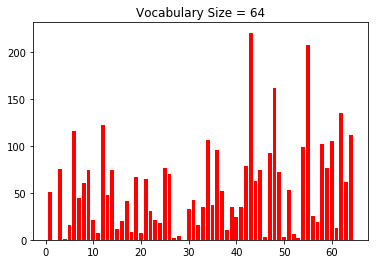

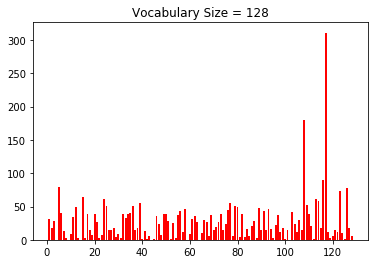

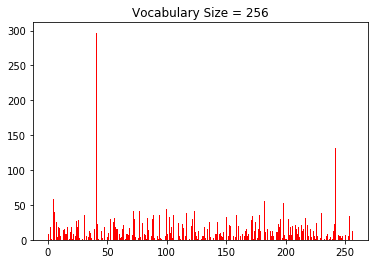

In [454]:
col = 'red'

fig1 = plt.figure()
plt.xlim( 0.5, 2.5 )
plt.bar( [1, 2], test_vq_2[ img_index ], color = col, width = 0.2 )
plt.title( 'Vocabulary Size = 2')

fig2 = plt.figure()
plt.bar( range( 1, 17 ), test_vq_16[ img_index ], color = col )
plt.title( 'Vocabulary Size = 16')


fig3 = plt.figure()
plt.bar( range( 1, 65 ), test_vq_64[ img_index ], color = col )
plt.title( 'Vocabulary Size = 64')


fig4 = plt.figure()
plt.bar( range( 1, 129 ), test_vq_128[ img_index ], color = col )
plt.title( 'Vocabulary Size = 128')


fig5 = plt.figure()
plt.bar( range( 1, 257 ), test_vq_256[ img_index ], color = col )
plt.title( 'Vocabulary Size = 256')


plt.show()

___

## Cross Validation

In [717]:
from sklearn.model_selection import KFold, LeaveOneOut

p_max_features = 12
p_n_estimators = 900
p_max_depth    = 8
p_criterion    = 'entropy'
p_max_features = 12


models = []
acc    = []

kf = KFold( n_splits = 10, shuffle = True )
kf.get_n_splits( train_vq_256 )

for train_idx, test_idx in kf.split( train_vq_256 ):
  
    X_train, X_test = train_vq_256[train_idx], train_vq_256[test_idx]
    Y_train, Y_test = label_tr[train_idx], label_tr[test_idx]
        
    clf_256_kfold = RandomForestClassifier( n_estimators = p_n_estimators, 
                              max_depth = p_max_depth, 
                              criterion = p_criterion,
                              max_features = p_max_features )
    
    model = clf_256_kfold.fit( X_train, Y_train )
    
    models.append( model )
    
    pred = clf_256_kfold.predict( X_test )
    
    
    accuracy = ( np.sum( pred == Y_test ) / Y_test.shape[ 0 ] * 100 )
    
    
    print( 'Accuracy: ', accuracy)
    
    acc.append( accuracy )

    

Accuracy:  100.0
Accuracy:  66.66666666666666
Accuracy:  60.0
Accuracy:  66.66666666666666
Accuracy:  66.66666666666666
Accuracy:  60.0
Accuracy:  60.0
Accuracy:  66.66666666666666
Accuracy:  73.33333333333333
Accuracy:  66.66666666666666


In [718]:
opt_pred = models[ 8 ].predict( test_vq_256 )

opt_accuracy = ( np.sum( opt_pred == label_te ) / label_te.shape[ 0 ] * 100 )

print( opt_accuracy )



75.33333333333333


Confusion matrix, without normalization
[[11  0  0  0  1  1  0  2  0  0]
 [ 0 14  0  0  0  0  1  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  1  2  2 11  0  0  0  1  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 1  0  3  0  1  1  9  1  1  1]
 [ 0  0  0  1  0  1  1 12  0  0]
 [ 3  0  1  2  2  0  4  0 12  0]
 [ 0  0  1  0  0  0  0  0  1 14]]
Normalized confusion matrix
[[0.73 0.   0.   0.   0.07 0.07 0.   0.13 0.   0.  ]
 [0.   0.93 0.   0.   0.   0.   0.07 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.06 0.12 0.12 0.65 0.   0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.06 0.   0.17 0.   0.06 0.06 0.5  0.06 0.06 0.06]
 [0.   0.   0.   0.07 0.   0.07 0.07 0.8  0.   0.  ]
 [0.12 0.   0.04 0.08 0.08 0.   0.17 0.   0.5  0.  ]
 [0.   0.   0.06 0.   0.   0.   0.   0.   0.06 0.88]]


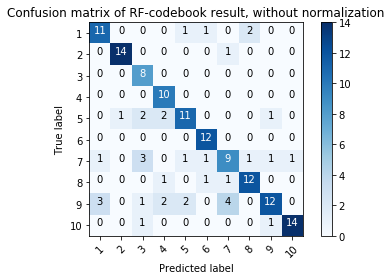

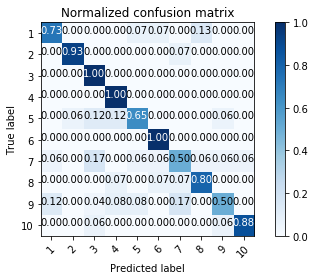

In [719]:
import itertools
from sklearn.metrics import confusion_matrix
class_names=[1,2,3,4,5,6,7,8,9,10]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
#     plt.figure(figsize=(20,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(opt_pred, label_te)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of RF-codebook result, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()